<a href="https://colab.research.google.com/github/Kh0uloud/Optimization-for-City-Public-Transport-Route/blob/main/Transform_the_problem_into_TSP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv("/content/drive/MyDrive/Bio_Inspired_Project/Data/data2023_06.csv")

In [4]:
df

,trip_id,ritnumber,sequence,time,stop_id,lat,lon,stop_code,stop_name,departure,classification,seats,operator,passengers,timestamp,elevation
0,168758612,4016,1,06:24,2511899,51.92499,4.46889,RTD,Rotterdam Centraal,RTD,2,600,NS,198,1687242240,0
1,168758612,4016,1,06:24,2511899,51.92499,4.46889,RTD,Rotterdam Centraal,RTD,2,600,NS,198,1687242240,0
2,168758612,4016,1,06:24,2511899,51.92499,4.46889,RTD,Rotterdam Centraal,RTD,2,480,NS,158,1687242240,0
3,168758612,4016,1,06:24,2511899,51.92499,4.46889,RTD,Rotterdam Centraal,RTD,2,600,NS,198,1687242240,0
4,168758612,4016,1,06:24,2511899,51.92499,4.46889,RTD,Rotterdam Centraal,RTD,2,600,NS,198,1687242240,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2162349,166111090,2985,31,00:46,2512035,51.00164,5.85868,STD,Sittard,STD,2,400,NS,132,1687221960,0
2162350,166111090,2985,31,00:46,2512035,51.00164,5.85868,STD,Sittard,STD,2,400,NS,132,1687221960,0
2162351,166111090,2985,31,00:46,2512035,51.00164,5.85868,STD,Sittard,STD,2,400,NS,132,1687221960,0
2162352,166111090,2985,31,00:46,2512035,51.00164,5.85868,STD,Sittard,STD,2,600,NS,198,1687221960,0


In [ ]:
list(df.trip_id.unique()).remove(168758612)

In [ ]:
df3

,sequence,distance,passengers,time
0,1,0.000000,362,05:47
1,2,27.142797,362,05:48
17,3,1.706951,362,06:04
18,4,21.502935,362,06:05
30,5,1.738524,362,06:17
31,6,12.400052,362,06:18
39,7,1.561380,362,06:26
40,8,25.357425,1265,06:27
55,9,1.675189,1265,06:42
56,10,63.765325,2400,06:51


In [ ]:
# Delete rows where distance < 2
df3 = df3[df3['distance'] >= 2]

df3['sequence'] = df3['sequence'].astype(str)

# Apply the function to the "sequence" column
df3['sequence'] = df3['sequence'] + '-' + df3['sequence'].shift(-1).astype(str)

# Drop the last row since it will have NaN value after shifting
df3 = df3.iloc[:-1]

# Display the updated DataFrame
print(df3)

    sequence   distance  passengers   time
1        2-4  27.142797         362  05:48
18       4-6  21.502935         362  06:05
31       6-8  12.400052         362  06:18
40      8-10  25.357425        1265  06:27
56     10-12  63.765325        2400  06:51
91     12-14  19.220238        2499  07:29
104    14-16  30.111697        2104  07:49


<ipython-input-27-8df424757a89>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['sequence'] = df3['sequence'].astype(str)
<ipython-input-27-8df424757a89>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['sequence'] = df3['sequence'] + '-' + df3['sequence'].shift(-1).astype(str)


Take several paths and choose which to adapt

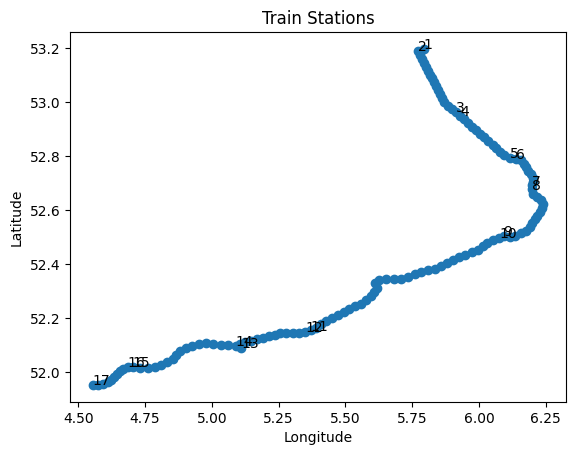

In [ ]:
# Extract longitude and latitude coordinates
longitudes = list(df2.lon)
latitudes = list(df2.lat)

# Plot the train stations
plt.scatter(longitudes, latitudes)

# Add labels to each point
a=0
for index, row in df2.iterrows():
    if row['sequence'] != a:
        plt.annotate(row['sequence'], (row['lon'], row['lat']))
        a= row['sequence']

# Set plot title and axis labels
plt.title('Train Stations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Display the plot
plt.show()

In [ ]:
a= [0 for _ in range (10)]
max_trip_id=[0 for _ in range (10)]
b=list(df.trip_id.unique())
for i in range(10):
    for trip_id in b:
        df_1 = df[df.trip_id == trip_id].drop_duplicates()
        n_rows = len(df_1)
        if n_rows > a[i] :
            a[i] = n_rows
            max_trip_id[i] = trip_id

    b.remove(max_trip_id[i])

In [ ]:
max_trip_id

[169044861,
 168235670,
 168744511,
 168749642,
 168750139,
 163056096,
 167926240,
 165692845,
 168745155,
 168749941]

In [6]:
max_trip_id=[169044861, 168235670, 168744511, 168749642, 168750139, 163056096, 167926240, 165692845, 168745155, 168749941]

In [5]:
from math import radians, cos, sin, asin, sqrt

def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)
    """
    # Convert decimal degrees to radians
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    km = 6367 * c  # Radius of earth in kilometers. Use 3956 for miles
    return km

Transform the dataset of train trips into a TSP-like problem formulation, where train stations represent the cities to be visited, and the distances between stations determine the edge weights. <br>
The code provides a visualization of the train stations' locations, their sequences, and the distances between them. This visualization serves as a basis for further applying the ACO algorithm to solve the TSP, optimizing the order of visiting the train stations for each trip, or maaby changes will happen inter-trips.

iteration  0
iteration  0  is completed
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
iteration  1


<ipython-input-18-3cd14e79320f>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop_duplicates(inplace=True)
<ipython-input-18-3cd14e79320f>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(['trip_id', 'ritnumber', 'operator', 'elevation'], axis=1, inplace=True)
<ipython-input-18-3cd14e79320f>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.passengers = df2

iteration  1  is completed
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
iteration  2


<ipython-input-18-3cd14e79320f>:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['distance']= df2.groupby('sequence')['distance'].transform('sum')
<ipython-input-18-3cd14e79320f>:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.drop_duplicates(inplace=True)
<ipython-input-18-3cd14e79320f>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop_duplicates(inplace=True

iteration  2  is completed
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
iteration  3
iteration  3  is completed
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
iteration  4


<ipython-input-18-3cd14e79320f>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.passengers = df2.passengers.astype(int)
<ipython-input-18-3cd14e79320f>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.passengers = df2.groupby('time')['passengers'].transform('sum')
<ipython-input-18-3cd14e79320f>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

iteration  4  is completed
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
iteration  5
iteration  5  is completed
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
iteration  6
iteration  6  is completed
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
iteration  7
iteration  7  is completed
_____________

<ipython-input-18-3cd14e79320f>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop_duplicates(inplace=True)
<ipython-input-18-3cd14e79320f>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(['trip_id', 'ritnumber', 'operator', 'elevation'], axis=1, inplace=True)
<ipython-input-18-3cd14e79320f>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.passengers = df2

iteration  8  is completed
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
iteration  9
iteration  9  is completed
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 


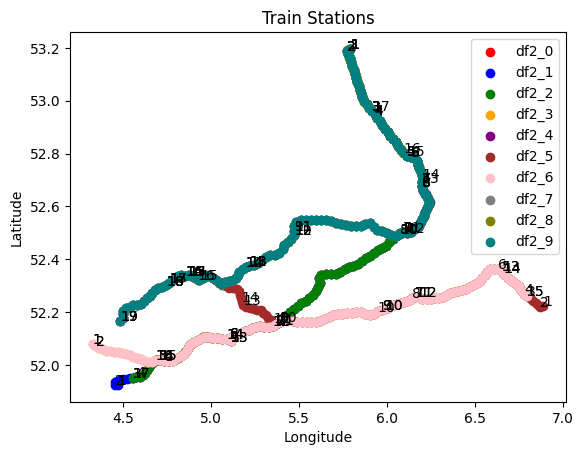

In [18]:
dfs = {}  # Dictionary to store the DataFrames
dfTrips = {}  # Dictionary to show the trips of 10 trains (longest trips)
dfDist = {}  # Dictionary to store distances between Train Stations
LTrainStations= []   #List of Train Stations we will take into consideration
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'teal']


fig, ax = plt.subplots()

for i in range(len(max_trip_id)):
    print('iteration ', i)
    var1 = f"df1_{i}"

    # Filter the data based on trip_id
    df1 = df[df['trip_id'] == max_trip_id[i]]
    df1.drop_duplicates(inplace=True)
    #df1.set_index('sequence', inplace=True)
    df1.drop(['trip_id', 'ritnumber', 'operator', 'elevation'], axis=1, inplace=True)
    #df1.set_index('time', inplace=True)
    #df1.sort_index(inplace=True)
    # Store the DataFrame in the dictionary
    dfs[var1] = df1

    var2 = f"df2_{i}"

    df2= df1[['sequence', 'lat', 'lon', 'time', 'passengers']]
    df2.passengers = df2.passengers.astype(int)
    df2.passengers = df2.groupby('time')['passengers'].transform('sum')
    df2.set_index('time', inplace=True)
    df2.sort_index(inplace=True)
    df2.drop_duplicates(inplace=True)
    df2.reset_index(inplace=True)

    # Calculate distance
    df2.lon = df2.lon.astype(float)
    df2.lat = df2.lat.astype(float)
    df2['lonshift'] = df2['lon'].shift(1)
    df2['latshift'] = df2['lat'].shift(1)
    df2['distance'] = df2.apply(lambda x: haversine(x['lonshift'], x['latshift'], x['lon'], x['lat']), axis=1)
    df2.drop(['lonshift', 'latshift'], axis=1, inplace=True)
    df2.distance[0]= 0

    # Extract longitude and latitude coordinates
    longitudes = list(df2.lon)
    latitudes = list(df2.lat)
    # Plot the train stations with a specific color
    ax.scatter(longitudes, latitudes, color=colors[i], label=var2)
    # Add labels to each point
    a = [[0]]
    for index, row in df2.iterrows():
        if row['sequence'] != a[-1][0]:
            ax.annotate(row['sequence'], (row['lon'], row['lat']))
            a.append([row['sequence'], row['lon'], row['lat']])
    a.pop(0)
    LTrainStations.append(a)


    dfTrips[var2] = df2

    var3 = f"df3_{i}"

    df3=df2[['sequence', 'lon', 'lat', 'distance', 'passengers']]
    df3['distance']= df2.groupby('sequence')['distance'].transform('sum')
    df3.drop_duplicates(inplace=True)
    df3['time']= df2['time']
    df3 = df3[df3['distance'] >= 2]
    df3['sequence'] = df3['sequence'].astype(str)
    df3['sequence'] = df3['sequence'] + '-' + df3['sequence'].shift(-1).astype(str)
    # Drop the last row since it will have NaN value after shifting
    df3 = df3.iloc[:-1]

    dfDist[var3] = df3

    print('iteration ', i, ' is completed')
    print("____________________________________________________________________ " )
    print("____________________________________________________________________ " )
    print("____________________________________________________________________ " )
    print("____________________________________________________________________ " )

# Set plot title and axis labels
ax.set_title('Train Stations')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
# Add a legend
ax.legend()
plt.show()

Next step <br>
==> Apply ACO <br>
==> See the real map (search for the place in which we're trying to apply a transport re-routing), and apply ACO (maybe in will change the station locations) <br>

In crowded places, we can add stations for example